# CSE555 – Deep Learning (Fall 2023)
# Homework_1

**Description: Experiments with Deep Neural Networks.**

You are expected to use the Python language and Keras library unless otherwise noted. You will
prepare a report including your code and results (in a Jupyter Notebook). The expected report format
is shown at the end of this document. You are encouraged to use Google Colab for computational
needs to do this work.

# Part 1: Training a deep feed forward network for multidimensional regression


## Example of a multi-output regression problem


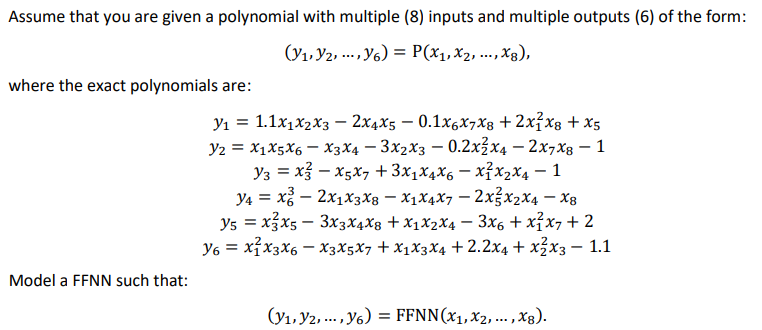abs

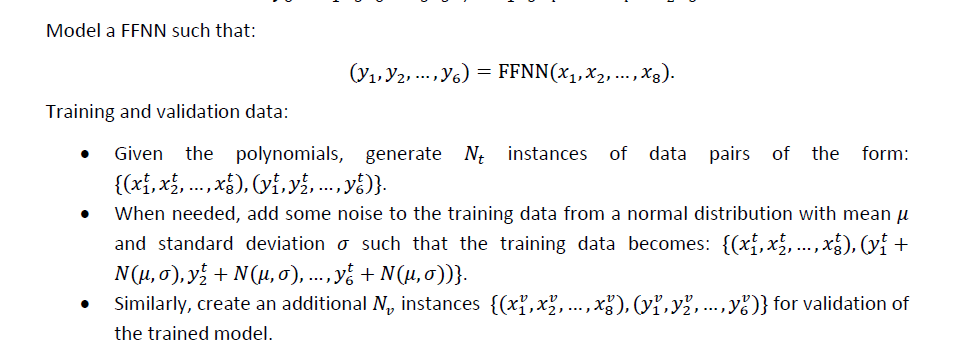

**Model training:**
1. Choose 𝑁𝑡
to be 1000.
2. In your training data add some noise to 𝑦𝑖
’s from a normal distribution with 𝜇 = 0.0 and 𝜎 =
0.001.
3. Build a feed forward network with exactly 3 hidden layers:
o Each layer should include exactly 6 nodes in the beginning.
o Use a combination of activation functions in these layers (use the same activation for
each node at a given layer).
4. Define your loss function:
o Use MSE for loss function.
5. Train your algorithm with SGD.
o Use appropriate learning rates and the number of epochs.
o Report the training and validation errors.
6. Repeat Steps 2-4 with another set of activation functions (3 different combinations), learning
rates (3 different schemes) and number of epochs (after finding a reasonable number of
epochs in the first trial, increase by 50% for 2 times).
7. Choose your best parameters after Step 5.
8. Add new nodes at a time to each hidden layer:
o Start from the first hidden layer, add two nodes, train, and record results.
o Move to the second hidden layer, add two nodes, train, and record results.
o Move to the third hidden layer, add two nodes, train, and record results.
o Repeat Step 8 until bias and variance curve is drawn (see Figure 1 for a fictitious
example from the first lecture).
9. Increase 𝑁𝑡 by 10% and repeat Step 8.
10. Report your all results

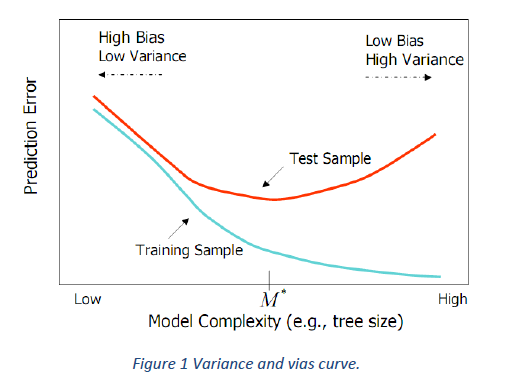

## Import  libraries & data

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

#  create dataset without noise

In [18]:
# create dataset without noise
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

# Generate a dataset without noise
X, y = make_regression(n_samples=1000, n_features=8, n_targets=6, noise=0, random_state=2)

# Scale the dataset to have values between 0 and 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Summarize the shape
print(X.shape, y.shape)


(1000, 8) (1000, 6)


##  Train Test Split of Data

In [19]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 8)
X_test shape: (200, 8)
y_train shape: (800, 6)
y_test shape: (200, 6)


In [20]:
scaler = MinMaxScaler() # Minmax scaler mostly used for deep learning as a rule of thumb

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance 

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from tensorflow.keras.optimizers import Adam


In [64]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [23]:

# define the model
model = Sequential()
model.add(Dense(6, input_dim=10, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(6, input_dim=10, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(6, input_dim=10, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(3))
model.compile(loss='mse', optimizer='adam')

In [24]:
# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),  # Input layer
    tf.keras.layers.Dense(6, activation='relu'),  # First hidden layer with ReLU activation
    tf.keras.layers.Dense(6, activation='tanh'),  # Second hidden layer with tanh activation
    tf.keras.layers.Dense(6, activation='sigmoid'),  # Third hidden layer with sigmoid activation
    tf.keras.layers.Dense(6)  # Output layer with softmax activation
])
model.compile(loss='mse')


In [25]:
model.summary()  # summary of the model, how many layers, how many nodes in each layer

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 54        
                                                                 
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
Total params: 180 (720.00 Byte)
Trainable params: 180 (720.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 100)

Epoch 1/100
22/22 [==============================] - 1s 8ms/step - loss: 0.0071 - val_loss: 0.0074
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.0061
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 8/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 10/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 11/

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,val_loss
0,0.007,0.007
1,0.007,0.007
2,0.006,0.006
3,0.006,0.006
4,0.006,0.006


<Axes: >

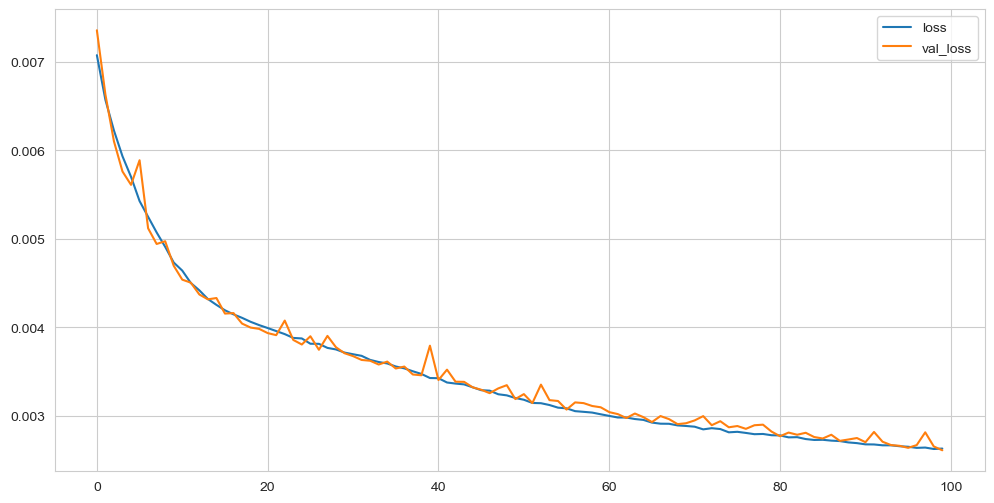

In [46]:
loss_df.plot()  

In [47]:
model.evaluate(X_train, y_train, verbose=0) 

0.0026009483262896538

In [48]:
model.evaluate(X_test, y_test, verbose=0)

0.0025044623762369156

## predict

In [59]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 5ms/step


In [65]:
eval_metric(y_test, y_pred)

r2_score: 0.6094963191341706 
mae: 0.07511007519935657 
mse: 0.00906024029731892 
rmse: 0.09518529454342682


#  create dataset with noise

In [49]:

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

# Generate a dataset with noise

X_noised, y_noised = make_regression(n_samples=1000, n_features=8, n_targets=6, noise=0.3, random_state=2)

# Scale the dataset to have values between 0 and 1
scaler = MinMaxScaler()
X_noised = scaler.fit_transform(X_noised)
y_noised = scaler.fit_transform(y_noised)

# Summarize the shape
print(X_noised.shape, y_noised.shape)


(1000, 8) (1000, 6)


In [50]:
print(y_noised)

[[0.67387302 0.77426702 0.70533742 0.66191349 0.76808667 0.73465549]
 [0.41624033 0.61270265 0.48369679 0.54925839 0.58877128 0.62837278]
 [0.29198431 0.3246574  0.29326388 0.38585997 0.30483247 0.311641  ]
 ...
 [0.10052263 0.3325172  0.21598942 0.31220233 0.27788186 0.35303543]
 [0.38815925 0.56340451 0.37981377 0.4965211  0.49434657 0.52523611]
 [0.63739108 0.4323985  0.5021523  0.57545356 0.4264949  0.63507539]]


##  Train Test Split of Data

In [51]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train_noised, X_test_noised, y_train_noised, y_test_noised = train_test_split(X_noised, y_noised, test_size=0.2, random_state=2)

# Print the shapes of the resulting sets
print("X_train_noised shape:", X_train_noised.shape)
print("X_test_noised shape:", X_test_noised.shape)
print("y_train_noised shape:", y_train_noised.shape)
print("y_test_noised shape:", y_test_noised.shape)

X_train_noised shape: (800, 8)
X_test_noised shape: (200, 8)
y_train_noised shape: (800, 6)
y_test_noised shape: (200, 6)


In [52]:
scaler = MinMaxScaler() # Minmax scaler mostly used for deep learning as a rule of thumb

In [53]:
X_train_noised = scaler.fit_transform(X_train_noised )
X_test_noised = scaler.transform(X_test_noised )

## Modelling & Model Performance 

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

In [173]:
# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),  # Input layer
    tf.keras.layers.Dense(8, activation='relu'),  # First hidden layer with ReLU activation
    tf.keras.layers.Dense(8, activation='relu'),  # Second hidden layer with tanh activation
    tf.keras.layers.Dense(8, activation='relu'),  # Third hidden layer with sigmoid activation
    tf.keras.layers.Dense(6)  # Output layer with softmax activation
])

#model.compile(loss='mse')
opt = Adam(learning_rate = 0.002) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [174]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 8)                 72        
                                                                 
 dense_45 (Dense)            (None, 8)                 72        
                                                                 
 dense_46 (Dense)            (None, 8)                 72        
                                                                 
 dense_47 (Dense)            (None, 6)                 54        
                                                                 
Total params: 270 (1.05 KB)
Trainable params: 270 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [175]:
model.fit(x = X_train_noised, y = y_train_noised, validation_split = 0.15, batch_size = 32, epochs = 100)

Epoch 1/100
22/22 [==============================] - 1s 11ms/step - loss: 0.2016 - val_loss: 0.1537
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1111 - val_loss: 0.0664
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0504 - val_loss: 0.0372
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0319 - val_loss: 0.0261
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0241 - val_loss: 0.0219
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0215 - val_loss: 0.0209
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0207 - val_loss: 0.0205
Epoch 8/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0203 - val_loss: 0.0202
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0201 - val_loss: 0.0201
Epoch 10/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0198 - val_loss: 0.0198
Epoch 11

In [183]:
loss_df = pd.DataFrame(model.history.history)
loss_df

""


<Axes: >

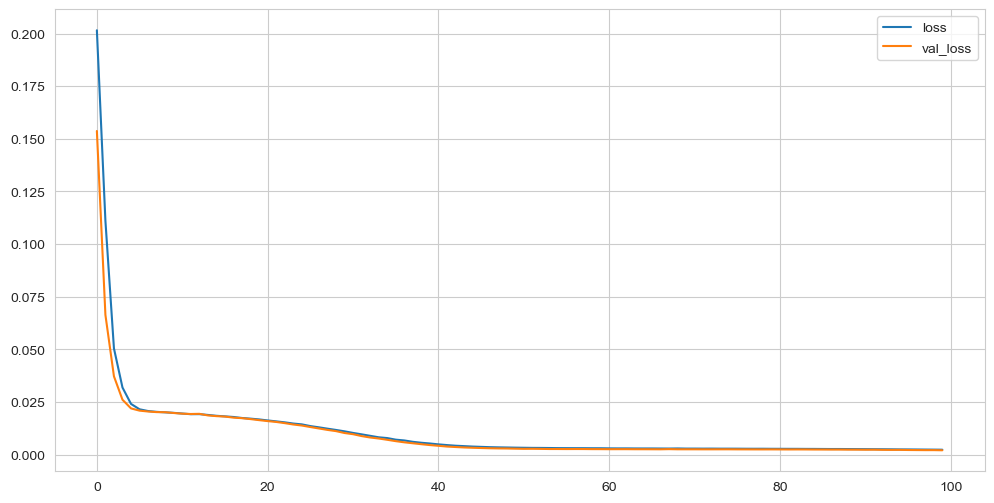

In [178]:
loss_df.plot()  

In [179]:
model.evaluate(X_train_noised, y_train_noised, verbose=0) 

0.002261687070131302

In [180]:
model.evaluate(X_test_noised, y_test_noised, verbose=0)

0.0024924189783632755

## predict

In [181]:
y_pred = model.predict(X_test_noised)

7/7 [==============================] - 0s 2ms/step


In [182]:
eval_metric(y_test_noised, y_pred)

r2_score: 0.9024196446609278 
mae: 0.03883167779383236 
mse: 0.002492418927303734 
rmse: 0.04992413171306772
